# Machine Learning - Algorithms Essay

## 0.0. Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree as tr
from sklearn import ensemble as en
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as pp
from sklearn import linear_model as lm

from sklearn import cluster as ct

from sklearn import metrics as mt

from matplotlib import pyplot as plt

from tabulate import tabulate

import time
from IPython import display

## 1.0. Load Datasets

### 1.1.1 Classification Data

In [2]:
#Import Classification Data
X_train_cl = pd.read_csv('data/classification/X_training.csv')
X_test_cl = pd.read_csv('data/classification/X_test.csv')
X_val_cl = pd.read_csv('data/classification/X_validation.csv')

y_train_cl = pd.read_csv('data/classification/y_training.csv')
y_test_cl = pd.read_csv('data/classification/y_test.csv')
y_val_cl = pd.read_csv('data/classification/y_validation.csv')

In [3]:
#Check X Data
X_val_cl

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,75635,1,0.525641,1.0,0.714055,1.0,1.0,1.0,1.0,0.8,...,0.75,0.75,0.8,0.8,0.000000,0.000000,0.0,1.0,1.0,0.0
1,106136,1,0.615385,1.0,0.054725,0.4,1.0,1.0,1.0,0.4,...,0.25,0.00,0.4,0.6,0.004916,0.004946,0.0,1.0,1.0,0.0
2,94469,1,0.435897,1.0,0.342690,0.0,0.2,0.2,0.6,0.8,...,0.25,0.75,0.4,0.6,0.004916,0.000000,1.0,0.0,1.0,0.0
3,42104,1,0.615385,1.0,0.649838,1.0,1.0,0.6,1.0,1.0,...,0.75,0.75,0.8,0.8,0.000000,0.000989,1.0,0.0,1.0,0.0
4,78762,1,0.282051,0.0,0.100363,0.4,0.6,0.6,0.6,0.4,...,0.75,0.75,0.6,0.4,0.093412,0.090010,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31074,18161,1,0.653846,0.0,0.080574,0.4,1.0,0.4,0.6,0.8,...,0.75,0.75,0.8,0.8,0.000000,0.000000,0.0,1.0,0.0,1.0
31075,54943,0,0.205128,0.0,0.135097,0.4,0.4,0.4,1.0,0.6,...,0.75,1.00,1.0,0.6,0.000000,0.000000,1.0,0.0,1.0,0.0
31076,2151,1,0.064103,1.0,0.437803,0.6,0.4,0.8,0.4,0.6,...,0.75,0.00,0.6,0.6,0.011799,0.026706,1.0,0.0,1.0,0.0
31077,92092,0,0.397436,1.0,0.311995,0.4,0.4,0.4,0.6,0.4,...,0.75,0.75,0.8,0.4,0.001967,0.000000,1.0,0.0,1.0,0.0


In [4]:
#Check Y Data
y_val_cl

,0
0,1
1,0
2,1
3,1
4,0
...,...
31074,0
31075,0
31076,0
31077,0


### 1.1.2 Regression Data

In [5]:
#Import Regression Data
X_train_rg = pd.read_csv('data/regression/X_training.csv')
X_test_rg = pd.read_csv('data/regression/X_test.csv')
X_val_rg = pd.read_csv('data/regression/X_validation.csv')

y_train_rg = pd.read_csv('data/regression/y_training.csv')
y_test_rg = pd.read_csv('data/regression/y_test.csv')
y_val_rg = pd.read_csv('data/regression/y_validation.csv')

In [6]:
#Check X Data
X_val_rg

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.143252,0.025900,0.616,0.933,0.000000,0.000000,0.3590,0.962307,0,0.0513,0.309853,0.8,0.806
1,0.363603,0.000188,0.490,0.972,0.029900,0.909091,0.3680,0.765216,0,0.1110,-0.908089,0.8,0.376
2,-1.409083,0.694000,0.876,0.167,0.912000,1.000000,0.3690,-1.733352,1,0.0885,-0.975052,0.8,0.845
3,0.270931,0.003750,0.770,0.801,0.002810,0.818182,0.0515,0.852812,0,0.0336,0.338018,0.8,0.725
4,0.367789,0.011600,0.596,0.869,0.173000,0.909091,0.0678,-1.177535,1,0.0370,-0.389052,0.8,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.521360,0.278000,0.694,0.595,0.003010,0.090909,0.4540,0.249548,1,0.0405,-0.387449,0.8,0.136
4517,-0.454343,0.076600,0.524,0.437,0.000016,0.000000,0.6460,-1.388964,0,0.0547,1.009002,0.8,0.176
4518,-0.294580,0.149000,0.921,0.684,0.000000,1.000000,0.0498,0.917466,0,0.3300,-0.317663,0.8,0.873
4519,1.144726,0.008220,0.668,0.628,0.000000,0.545455,0.1450,0.554308,0,0.2050,0.377059,0.8,0.621


In [7]:
#Check Y Data
y_val_rg

,song_popularity
0,60.0
1,48.0
2,43.0
3,59.0
4,79.0
...,...
4516,67.0
4517,39.0
4518,33.0
4519,64.0


### 1.1.3 Clustering Data

In [8]:
#Import Clustering Data
X_ct = pd.read_csv('data/clustering/X_dataset.csv')

In [9]:
#Check Data
X_ct

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,0.970356,0.305159,0.301803,-0.332922,0.241379,0.056962,1.274310,-0.930179,1.142811,0.130081,0.172161,0.329529
174,0.493343,0.626482,0.414820,1.052516,0.158572,0.282759,0.086498,0.549108,-0.316950,0.969783,0.178862,0.106227,0.336662
175,0.332758,0.699605,-0.389355,0.151661,1.422412,0.210345,0.073840,0.549108,-0.422075,2.224236,0.089431,0.106227,0.397290
176,0.209232,0.365613,0.012732,0.151661,1.422412,0.231034,0.071730,1.354888,-0.229346,1.834923,0.097561,0.128205,0.400856


## 2.0. Data Preparation

In [10]:
#Data already prepared on the Import step

## 3.0. Model Trainning

### 3.1. Classification

Algorithms:

- K-Nearest Neighbors (KNN)

- Decision Tree Classifier

- Random Forest Classifier

- Logistic Regression

#### 3.1.1 KNN

In [11]:
#Model Definition
knn = KNeighborsClassifier(n_neighbors=2)

#Model Fit
knn.fit(X_train_cl, y_train_cl)

#Model Predict
yhat_knn_cl_train = knn.predict(X_train_cl)
yhat_knn_cl_val = knn.predict(X_val_cl)
yhat_knn_cl_test = knn.predict(X_test_cl)

c:\ProgramData\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### 3.1.2 Decision Tree

In [12]:
#Model Definition
dtc = tr.DecisionTreeClassifier()

#Model Fit
dtc.fit(X_train_cl, y_train_cl)

#Model Predict
yhat_dtc_cl_train = dtc.predict(X_train_cl)
yhat_dtc_cl_val = dtc.predict(X_val_cl)
yhat_dtc_cl_test = dtc.predict(X_test_cl)

#### 3.1.3 Random Forest

In [13]:
#Model Definition
rfc = en.RandomForestClassifier()

#Model Fit
rfc.fit(X_train_cl, y_train_cl)

#Model Predict
yhat_rfc_cl_train = rfc.predict(X_train_cl)
yhat_rfc_cl_val = rfc.predict(X_val_cl)
yhat_rfc_cl_test = rfc.predict(X_test_cl)

#yhat_test = model.predict_proba(X_test)[:, 1]

C:\Users\Caio\AppData\Local\Temp\ipykernel_3408\4157545515.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_cl, y_train_cl)


#### 3.1.4 Logistic Regression

In [14]:
#Model Definition
lrc = LogisticRegression()

#Model Fit
lrc.fit(X_train_cl, y_train_cl)

#Model Predict
yhat_lrc_cl_train = lrc.predict(X_train_cl)
yhat_lrc_cl_val = lrc.predict(X_val_cl)
yhat_lrc_cl_test = lrc.predict(X_test_cl)

c:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.2. Regression

Algorithms:

- Linear Regression

- Decision Tree Regressor

- Random Forest Regressor

- Polynomial Regression

- Linear Regression Lasso

- Linear Regression Ridge

- Linear Regression Elastic Net

- Linear Regression RANSAC

- Polynomial Regression Lasso

- Polynomial Regression Ridge

- Polynomial Regression Elastic Net

- Polynomial Regression RANSAC

#### 3.2.1 Linear Regression

In [15]:
#Model Definition
lr = LinearRegression()

#Model Fit
lr.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_lr_rg_train = lr.predict(X_train_rg)
yhat_lr_rg_val = lr.predict(X_val_rg)
yhat_lr_rg_test = lr.predict(X_test_rg)

#### 3.2.2 Decision Tree Regression

In [16]:
#Model Definition
dtr = tr.DecisionTreeRegressor()

#Model Fit
dtr.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_dtr_rg_train = dtr.predict(X_train_rg)
yhat_dtr_rg_val = dtr.predict(X_val_rg)
yhat_dtr_rg_test = dtr.predict(X_test_rg)

#### 3.2.3 Random Forest Regression

In [17]:
#Model Definition
rfr = en.RandomForestRegressor()

#Model Fit
rfr.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_rfr_rg_train = rfr.predict(X_train_rg)
yhat_rfr_rg_val = rfr.predict(X_val_rg)
yhat_rfr_rg_test = rfr.predict(X_test_rg)

C:\Users\Caio\AppData\Local\Temp\ipykernel_3408\4103522973.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train_rg, y_train_rg)


#### 3.2.4 Polynomial Regression

In [18]:
#Set Polynomial Features
#Model Definition
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

#Model Fit
X_poly_train = poly.fit_transform(X_train_rg)
X_poly_val = poly.fit_transform(X_val_rg)
X_poly_test = poly.fit_transform(X_test_rg)

#Linear Regression for Previous Polynomial Model
#Model Definition
pr = LinearRegression()

#Model Fit
pr.fit(X_poly_train, y_train_rg)

#Model Predict
yhat_pr_rg_train = pr.predict(X_poly_train)
yhat_pr_rg_val = pr.predict(X_poly_val)
yhat_pr_rg_test = pr.predict(X_poly_test)

#### 3.2.5 Linear Regression Lasso

In [19]:
#Model Definition
lasso = lm.Lasso()

#Model Fit
lasso.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_lasso_rg_train = lasso.predict(X_train_rg)
yhat_lasso_rg_val = lasso.predict(X_val_rg)
yhat_lasso_rg_test = lasso.predict(X_test_rg)

#### 3.2.6 Linear Regression Ridge

In [20]:
#Model Definition
ridge = lm.Ridge()

#Model Fit
ridge.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_ridge_rg_train = ridge.predict(X_train_rg)
yhat_ridge_rg_val = ridge.predict(X_val_rg)
yhat_ridge_rg_test = ridge.predict(X_test_rg)

#### 3.2.7 Linear Regression Elastic Net

In [21]:
#Model Definition
elnet = lm.ElasticNet()

#Model Fit
elnet.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_elnet_rg_train = elnet.predict(X_train_rg)
yhat_elnet_rg_val = elnet.predict(X_val_rg)
yhat_elnet_rg_test = elnet.predict(X_test_rg)

#### 3.2.8 Linear Regression RANSAC

In [22]:
#Model Definition
ransac = lm.RANSACRegressor()

#Model Fit
ransac.fit(X_train_rg, y_train_rg)

#Model Predict
yhat_ransac_rg_train = ransac.predict(X_train_rg)
yhat_ransac_rg_val = ransac.predict(X_val_rg)
yhat_ransac_rg_test = ransac.predict(X_test_rg)

#### 3.2.9 Polynomial Regression Lasso

In [23]:
#Set Polynomial Features
#Model Definition
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

#Model Fit
X_poly_train = poly.fit_transform(X_train_rg)
X_poly_val = poly.fit_transform(X_val_rg)
X_poly_test = poly.fit_transform(X_test_rg)

#Lasso for Previous Polynomial Model
#Model Definition
prlasso = lm.Lasso()

#Model Fit
prlasso.fit(X_poly_train, y_train_rg)

#Model Predict
yhat_prlasso_rg_train = prlasso.predict(X_poly_train)
yhat_prlasso_rg_val = prlasso.predict(X_poly_val)
yhat_prlasso_rg_test = prlasso.predict(X_poly_test)

#### 3.2.10 Polynomial Regression Ridge

In [24]:
#Set Polynomial Features
#Model Definition
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

#Model Fit
X_poly_train = poly.fit_transform(X_train_rg)
X_poly_val = poly.fit_transform(X_val_rg)
X_poly_test = poly.fit_transform(X_test_rg)

#Ridge for Previous Polynomial Model
#Model Definition
prridge = lm.Ridge()

#Model Fit
prridge.fit(X_poly_train, y_train_rg)

#Model Predict
yhat_prridge_rg_train = prridge.predict(X_poly_train)
yhat_prridge_rg_val = prridge.predict(X_poly_val)
yhat_prridge_rg_test = prridge.predict(X_poly_test)

#### 3.2.11 Polynomial Regression Elastic Net

In [25]:
#Set Polynomial Features
#Model Definition
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

#Model Fit
X_poly_train = poly.fit_transform(X_train_rg)
X_poly_val = poly.fit_transform(X_val_rg)
X_poly_test = poly.fit_transform(X_test_rg)

#Elastic Net for Previous Polynomial Model
#Model Definition
prelnet = lm.ElasticNet()

#Model Fit
prelnet.fit(X_poly_train, y_train_rg)

#Model Predict
yhat_prelnet_rg_train = prelnet.predict(X_poly_train)
yhat_prelnet_rg_val = prelnet.predict(X_poly_val)
yhat_prelnet_rg_test = prelnet.predict(X_poly_test)

#### 3.2.12 Polynomial Regression RANSAC

In [26]:
#Set Polynomial Features
#Model Definition
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

#Model Fit
X_poly_train = poly.fit_transform(X_train_rg)
X_poly_val = poly.fit_transform(X_val_rg)
X_poly_test = poly.fit_transform(X_test_rg)

#Ransac for Previous Polynomial Model
#Model Definition
prransac = lm.RANSACRegressor()

#Model Fit
prransac.fit(X_poly_train, y_train_rg)

#Model Predict
yhat_prransac_rg_train = prransac.predict(X_poly_train)
yhat_prransac_rg_val = prransac.predict(X_poly_val)
yhat_prransac_rg_test = prransac.predict(X_poly_test)

### 3.3 Clustering

Algorithms:

- K-Means

- Affinity Propagation

#### 3.3.1 K-Means

In [27]:
#Check Silhouette Score for number of Clusters

#Set range to verify 
clusters_kmeans = np.arange(2, 11, 1)

ss_list_kmeans = []

#Check AVG of Silhouette Score by Cluster numbers
for k in clusters_kmeans:
    kmeans = ct.KMeans(n_clusters=k, init='random', n_init=10, random_state=0)

    labels_kmeans = kmeans.fit_predict(X_ct)

    ss_avg_kmeans = mt.silhouette_score(X_ct, labels_kmeans)
    ss_list_kmeans.append(ss_avg_kmeans)

    print('Cluster: {} - AVG SS: {}'.format(k, ss_avg_kmeans))

Cluster: 2 - AVG SS: 0.213219480988304
Cluster: 3 - AVG SS: 0.23295918228054466
Cluster: 4 - AVG SS: 0.20734009812962859
Cluster: 5 - AVG SS: 0.18810237999195065
Cluster: 6 - AVG SS: 0.1994707998777152
Cluster: 7 - AVG SS: 0.2110374054772895
Cluster: 8 - AVG SS: 0.18664634079402675
Cluster: 9 - AVG SS: 0.19629284442628037
Cluster: 10 - AVG SS: 0.19416029217785724


In [28]:
#Model Definition
kmeans = ct.KMeans(n_clusters=k, init='random', n_init=10, random_state=0)

#Model Fit / Predict
labels_kmeans = kmeans.fit_predict(X_ct)

#### 3.3.2 Affinity Propagation

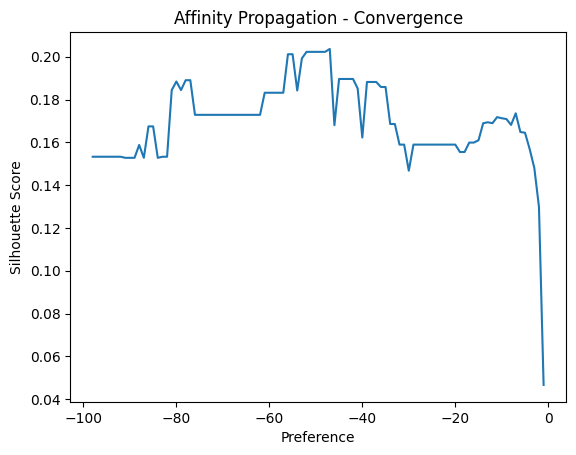

<Figure size 640x480 with 0 Axes>

In [29]:
#Define item to iteract
p = np.arange(-1, -100, -1)
ss_list_afp = []

fig = plt.figure()

for i in range(len(p)):
    #Model Definition
    afp = ct.AffinityPropagation(preference=p[i])

    #Model Fit
    afp.fit(X_ct)

    #Clustering Data
    labels_afp = afp.predict(X_ct)

    #Check Metric
    ss_afp = mt.silhouette_score(X_ct, labels_afp)
    ss_list_afp.append(ss_afp)

    #Plot Silhouette Score
    plt.plot(p[:i], ss_list_afp[:i])

    plt.title('Affinity Propagation - Convergence')
    plt.xlabel('Preference')
    plt.ylabel('Silhouette Score')

    display.clear_output(wait=True)

    plt.show()
    plt.gcf()
    time.sleep(0.05)

In [30]:
#Show Final Clustering
max_index = ss_list_afp.index(max(ss_list_afp))

#Model Definition
afp_final = ct.AffinityPropagation(preference=p[max_index])

#Model Fit
cluster_afp = afp_final.fit(X_ct)

## 4.0 Performance

### 4.1. Classification

#### 4.1.1 Accuracy

In [31]:
#KNN - Train
print('> KNN:')
acc_train_knn = mt.accuracy_score(y_train_cl, yhat_knn_cl_train)
print('Accuracy (Train): {:.2f}%'.format(acc_train_knn*100))

#KNN - Validation
acc_val_knn = mt.accuracy_score(y_val_cl, yhat_knn_cl_val)
print('Accuracy (Validation): {:.2f}%'.format(acc_val_knn*100))

#KNN - Test
acc_test_knn = mt.accuracy_score(y_test_cl, yhat_knn_cl_test)
print('Accuracy (Test): {:.2f}%'.format(acc_test_knn*100))
print('\n*****\n')

#********************

#Decicion Tree - Train
print('> Decision Tree Classifier:')
acc_train_dtc = mt.accuracy_score(y_train_cl, yhat_dtc_cl_train)
print('Accuracy (Train): {:.2f}%'.format(acc_train_dtc*100))

#Decicion Tree - Validation
acc_val_dtc = mt.accuracy_score(y_val_cl, yhat_dtc_cl_val)
print('Accuracy (Validation): {:.2f}%'.format(acc_val_dtc*100))

#Decicion Tree - Test
acc_test_dtc = mt.accuracy_score(y_test_cl, yhat_dtc_cl_test)
print('Accuracy (Test): {:.2f}%'.format(acc_test_dtc*100))
print('\n*****\n')

#********************

#Random Forest - Train
print('> Random Forest Classifier:')
acc_train_rfc = mt.accuracy_score(y_train_cl, yhat_rfc_cl_train)
print('Accuracy (Train): {:.2f}%'.format(acc_train_rfc*100))

#Random Forest - Validation
acc_val_rfc = mt.accuracy_score(y_val_cl, yhat_rfc_cl_val)
print('Accuracy (Validation): {:.2f}%'.format(acc_val_rfc*100))

#Random Forest - Test
acc_test_rfc = mt.accuracy_score(y_test_cl, yhat_rfc_cl_test)
print('Accuracy (Test): {:.2f}%'.format(acc_test_rfc*100))
print('\n*****\n')

#********************

#Logistic Regression - Train
print('> Logistic Regressor:')
acc_train_lrc = mt.accuracy_score(y_train_cl, yhat_lrc_cl_train)
print('Accuracy (Train): {:.2f}%'.format(acc_train_lrc*100))

#Logistic Regression - Validation
acc_val_lrc = mt.accuracy_score(y_val_cl, yhat_lrc_cl_val)
print('Accuracy (Validation): {:.2f}%'.format(acc_val_lrc*100))

#Logistic Regression - Test
acc_test_lrc = mt.accuracy_score(y_test_cl, yhat_lrc_cl_test)
print('Accuracy (Test): {:.2f}%'.format(acc_test_lrc*100))
print('\n*****\n')

#********************

> KNN:
Accuracy (Train): 84.02%
Accuracy (Validation): 66.13%
Accuracy (Test): 65.79%

*****

> Decision Tree Classifier:
Accuracy (Train): 100.00%
Accuracy (Validation): 94.55%
Accuracy (Test): 94.55%

*****

> Random Forest Classifier:
Accuracy (Train): 100.00%
Accuracy (Validation): 96.49%
Accuracy (Test): 96.39%

*****

> Logistic Regressor:
Accuracy (Train): 56.66%
Accuracy (Validation): 56.66%
Accuracy (Test): 56.11%

*****



#### 4.1.2 Precision

In [32]:
#KNN - Train
print('> KNN:')
prec_train_knn = mt.precision_score(y_train_cl, yhat_knn_cl_train)
print('Precision (Train): {:.2f}%'.format(prec_train_knn*100))

#KNN - Validation
prec_val_knn = mt.precision_score(y_val_cl, yhat_knn_cl_val)
print('Precision (Validation): {:.2f}%'.format(prec_val_knn*100))

#KNN - Test
prec_test_knn = mt.precision_score(y_test_cl, yhat_knn_cl_test)
print('Precision (Test): {:.2f}%'.format(prec_test_knn*100))
print('\n*****\n')

#********************

#Decicion Tree - Train
print('> Decision Tree Classifier:')
prec_train_dtc = mt.precision_score(y_train_cl, yhat_dtc_cl_train)
print('Precision (Train): {:.2f}%'.format(prec_train_dtc*100))

#Decicion Tree - Validation
prec_val_dtc = mt.precision_score(y_val_cl, yhat_dtc_cl_val)
print('Precision (Validation): {:.2f}%'.format(prec_val_dtc*100))

#Decicion Tree - Test
prec_test_dtc = mt.precision_score(y_test_cl, yhat_dtc_cl_test)
print('Precision (Test): {:.2f}%'.format(prec_test_dtc*100))
print('\n*****\n')

#********************

#Random Forest - Train
print('> Random Forest Classifier:')
prec_train_rfc = mt.precision_score(y_train_cl, yhat_rfc_cl_train)
print('Precision (Train): {:.2f}%'.format(prec_train_rfc*100))

#Random Forest - Validation
prec_val_rfc = mt.precision_score(y_val_cl, yhat_rfc_cl_val)
print('Precision (Validation): {:.2f}%'.format(prec_val_rfc*100))

#Random Forest - Test
prec_test_rfc = mt.precision_score(y_test_cl, yhat_rfc_cl_test)
print('Precision (Test): {:.2f}%'.format(prec_test_rfc*100))
print('\n*****\n')

#********************

#Logistic Regression - Train
print('> Logistic Regressor:')
prec_train_lrc = mt.precision_score(y_train_cl, yhat_lrc_cl_train)
print('Precision (Train): {:.2f}%'.format(prec_train_lrc*100))

#Logistic Regression - Validation
prec_val_lrc = mt.precision_score(y_val_cl, yhat_lrc_cl_val)
print('Precision (Validation): {:.2f}%'.format(prec_val_lrc*100))

#Logistic Regression - Test
prec_test_lrc = mt.precision_score(y_test_cl, yhat_lrc_cl_test)
print('Precision (Test): {:.2f}%'.format(prec_test_lrc*100))
print('\n*****\n')

#********************


> KNN:
Precision (Train): 100.00%
Precision (Validation): 68.39%
Precision (Test): 68.94%

*****

> Decision Tree Classifier:
Precision (Train): 100.00%
Precision (Validation): 93.58%
Precision (Test): 93.56%

*****

> Random Forest Classifier:
Precision (Train): 100.00%
Precision (Validation): 97.41%
Precision (Test): 97.22%

*****

> Logistic Regressor:
Precision (Train): 0.00%
Precision (Validation): 0.00%
Precision (Test): 0.00%

*****



c:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4.1.3 Recall

In [33]:
#KNN - Train
print('> KNN:')
rec_train_knn = mt.recall_score(y_train_cl, yhat_knn_cl_train)
print('Recall (Train): {:.2f}%'.format(rec_train_knn*100))

#KNN - Validation
rec_val_knn = mt.recall_score(y_val_cl, yhat_knn_cl_val)
print('Recall (Validation): {:.2f}%'.format(rec_val_knn*100))

#KNN - Test
rec_test_knn = mt.recall_score(y_test_cl, yhat_knn_cl_test)
print('Recall (Test): {:.2f}%'.format(rec_test_knn*100))
print('\n*****\n')

#********************

#Decicion Tree - Train
print('> Decision Tree Classifier:')
rec_train_dtc = mt.recall_score(y_train_cl, yhat_dtc_cl_train)
print('Recall (Train): {:.2f}%'.format(rec_train_dtc*100))

#Decicion Tree - Validation
rec_val_dtc = mt.recall_score(y_val_cl, yhat_dtc_cl_val)
print('Recall (Validation): {:.2f}%'.format(rec_val_dtc*100))

#Decicion Tree - Test
rec_test_dtc = mt.recall_score(y_test_cl, yhat_dtc_cl_test)
print('Recall (Test): {:.2f}%'.format(rec_test_dtc*100))
print('\n*****\n')

#********************

#Random Forest - Train
print('> Random Forest Classifier:')
rec_train_rfc = mt.recall_score(y_train_cl, yhat_rfc_cl_train)
print('Recall (Train): {:.2f}%'.format(rec_train_rfc*100))

#Random Forest - Validation
rec_val_rfc = mt.recall_score(y_val_cl, yhat_rfc_cl_val)
print('Recall (Validation): {:.2f}%'.format(rec_val_rfc*100))

#Random Forest - Test
rec_test_rfc = mt.recall_score(y_test_cl, yhat_rfc_cl_test)
print('Recall (Test): {:.2f}%'.format(rec_test_rfc*100))
print('\n*****\n')

#********************

#Logistic Regression - Train
print('> Logistic Regressor:')
rec_train_lrc = mt.recall_score(y_train_cl, yhat_lrc_cl_train)
print('Recall (Train): {:.2f}%'.format(rec_train_lrc*100))

#Logistic Regression - Validation
rec_val_lrc = mt.recall_score(y_val_cl, yhat_lrc_cl_val)
print('Recall (Validation): {:.2f}%'.format(rec_val_lrc*100))

#Logistic Regression - Test
rec_test_lrc = mt.recall_score(y_test_cl, yhat_lrc_cl_test)
print('Recall (Test): {:.2f}%'.format(rec_test_lrc*100))
print('\n*****\n')

#********************

> KNN:
Recall (Train): 63.13%
Recall (Validation): 40.61%
Recall (Test): 40.15%

*****

> Decision Tree Classifier:
Recall (Train): 100.00%
Recall (Validation): 93.85%
Recall (Test): 94.07%

*****

> Random Forest Classifier:
Recall (Train): 100.00%
Recall (Validation): 94.41%
Recall (Test): 94.47%

*****

> Logistic Regressor:
Recall (Train): 0.00%
Recall (Validation): 0.00%
Recall (Test): 0.00%

*****



#### 4.1.4 F1-Score

In [34]:
#KNN - Train
print('> KNN:')
f1_train_knn = mt.f1_score(y_train_cl, yhat_knn_cl_train)
print('F1-Score (Train): {:.2f}%'.format(f1_train_knn*100))

#KNN - Validation
f1_val_knn = mt.f1_score(y_val_cl, yhat_knn_cl_val)
print('F1-Score (Validation): {:.2f}%'.format(f1_val_knn*100))

#KNN - Test
f1_test_knn = mt.f1_score(y_test_cl, yhat_knn_cl_test)
print('F1-Score (Test): {:.2f}%'.format(f1_test_knn*100))
print('\n*****\n')

#********************

#Decicion Tree - Train
print('> Decision Tree Classifier:')
f1_train_dtc = mt.f1_score(y_train_cl, yhat_dtc_cl_train)
print('F1-Score (Train): {:.2f}%'.format(f1_train_dtc*100))

#Decicion Tree - Validation
f1_val_dtc = mt.f1_score(y_val_cl, yhat_dtc_cl_val)
print('F1-Score (Validation): {:.2f}%'.format(rec_val_dtc*100))

#Decicion Tree - Test
f1_test_dtc = mt.f1_score(y_test_cl, yhat_dtc_cl_test)
print('F1-Score (Test): {:.2f}%'.format(f1_test_dtc*100))
print('\n*****\n')

#********************

#Random Forest - Train
print('> Random Forest Classifier:')
f1_train_rfc = mt.f1_score(y_train_cl, yhat_rfc_cl_train)
print('F1-Score (Train): {:.2f}%'.format(f1_train_rfc*100))

#Random Forest - Validation
f1_val_rfc = mt.f1_score(y_val_cl, yhat_rfc_cl_val)
print('F1-Score (Validation): {:.2f}%'.format(f1_val_rfc*100))

#Random Forest - Test
f1_test_rfc = mt.f1_score(y_test_cl, yhat_rfc_cl_test)
print('F1-Score (Test): {:.2f}%'.format(f1_test_rfc*100))
print('\n*****\n')

#********************

#Logistic Regression - Train
print('> Logistic Regressor:')
f1_train_lrc = mt.f1_score(y_train_cl, yhat_lrc_cl_train)
print('F1-Score (Train): {:.2f}%'.format(f1_train_lrc*100))

#Logistic Regression - Validation
f1_val_lrc = mt.f1_score(y_val_cl, yhat_lrc_cl_val)
print('F1-Score (Validation): {:.2f}%'.format(f1_val_lrc*100))

#Logistic Regression - Test
f1_test_lrc = mt.f1_score(y_test_cl, yhat_lrc_cl_test)
print('F1-Score (Test): {:.2f}%'.format(f1_test_lrc*100))
print('\n*****\n')

#********************

> KNN:
F1-Score (Train): 77.40%
F1-Score (Validation): 50.96%
F1-Score (Test): 50.75%

*****

> Decision Tree Classifier:
F1-Score (Train): 100.00%
F1-Score (Validation): 93.85%
F1-Score (Test): 93.81%

*****

> Random Forest Classifier:
F1-Score (Train): 100.00%
F1-Score (Validation): 95.89%
F1-Score (Test): 95.82%

*****

> Logistic Regressor:
F1-Score (Train): 0.00%
F1-Score (Validation): 0.00%
F1-Score (Test): 0.00%

*****



#### 4.1.5 Summary Table

In [35]:
#Show results on table - Train Data
tab_cl_train = [['KNN', acc_train_knn, prec_train_knn, rec_train_knn, f1_train_knn],
                ['Decision Tree Classifier', acc_train_dtc, prec_train_dtc, rec_train_dtc, f1_train_dtc],
                ['Random Forest Classifier', acc_train_rfc, prec_train_rfc, rec_train_rfc, f1_train_rfc],
                ['Logistic Regression', acc_train_lrc, prec_train_lrc, rec_train_lrc, f1_train_lrc]]

head_cl = ['MODEL', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

print('> Train Data:')
print(tabulate(tab_cl_train, head_cl, tablefmt='fancy_grid'))

> Train Data:
╒══════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ MODEL                    │   Accuracy │   Precision │   Recall │   F1-Score │
╞══════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ KNN                      │   0.840199 │           1 │ 0.631284 │   0.773972 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree Classifier │   1        │           1 │ 1        │   1        │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest Classifier │   1        │           1 │ 1        │   1        │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression      │   0.5666   │           0 │ 0        │   0        │
╘══════════════════════════╧════════════╧═════════════╧══════════╧════════════╛


In [36]:
#Show results on table - Validation Data
tab_cl_val = [['KNN', acc_val_knn, prec_val_knn, rec_val_knn, f1_val_knn],
                ['Decision Tree Classifier', acc_val_dtc, prec_val_dtc, rec_val_dtc, f1_val_dtc],
                ['Random Forest Classifier', acc_val_rfc, prec_val_rfc, rec_val_rfc, f1_val_rfc],
                ['Logistic Regression', acc_val_lrc, prec_val_lrc, rec_val_lrc, f1_val_lrc]]

head_cl = ['MODEL', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

print('> Validation Data:')
print(tabulate(tab_cl_val, head_cl, tablefmt='fancy_grid'))

> Validation Data:
╒══════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ MODEL                    │   Accuracy │   Precision │   Recall │   F1-Score │
╞══════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ KNN                      │   0.661283 │    0.683921 │ 0.406118 │   0.509619 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree Classifier │   0.945462 │    0.935816 │ 0.938526 │   0.937169 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest Classifier │   0.964896 │    0.974108 │ 0.944094 │   0.958866 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression      │   0.566621 │    0        │ 0        │   0        │
╘══════════════════════════╧════════════╧═════════════╧══════════╧════════════╛


In [37]:
#Show results on table - Test Data
tab_cl_test = [['KNN', acc_test_knn, prec_test_knn, rec_test_knn, f1_test_knn],
                ['Decision Tree Classifier', acc_test_dtc, prec_test_dtc, rec_test_dtc, f1_test_dtc],
                ['Random Forest Classifier', acc_test_rfc, prec_test_rfc, rec_test_rfc, f1_test_rfc],
                ['Logistic Regression', acc_test_lrc, prec_test_lrc, rec_test_lrc, f1_test_lrc]]

head_cl = ['MODEL', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

print('> Test Data:')
print(tabulate(tab_cl_test, head_cl, tablefmt='fancy_grid'))

> Test Data:
╒══════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ MODEL                    │   Accuracy │   Precision │   Recall │   F1-Score │
╞══════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ KNN                      │   0.6579   │    0.689379 │ 0.401496 │   0.507451 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree Classifier │   0.945545 │    0.935591 │ 0.940695 │   0.938136 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest Classifier │   0.963851 │    0.9722   │ 0.944655 │   0.958229 │
├──────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression      │   0.561078 │    0        │ 0        │   0        │
╘══════════════════════════╧════════════╧═════════════╧══════════╧════════════╛


### 4.2. Regression

#### 4.2.1 R2

In [38]:
#Linear Regressor - Train
print('> Linear Regressor:')
r2_train_lr = mt.r2_score(y_train_rg, yhat_lr_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_lr*100))

#Linear Regressor - Validation
r2_val_lr = mt.r2_score(y_val_rg, yhat_lr_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_lr*100))

#Linear Regressor - Test
r2_test_lr = mt.r2_score(y_test_rg, yhat_lr_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_lr*100))
print('\n*****\n')

#********************

#Decision Tree Regressor - Train
print('> Decision Tree Regressor:')
r2_train_dtr = mt.r2_score(y_train_rg, yhat_dtr_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_dtr*100))

#Decision Tree Regressor - Validation
r2_val_dtr = mt.r2_score(y_val_rg, yhat_dtr_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_dtr*100))

#Decision Tree Regressor - Test
r2_test_dtr = mt.r2_score(y_test_rg, yhat_dtr_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_dtr*100))
print('\n*****\n')

#********************

#Random Forest Regressor - Train
print('> Random Forest Regressor:')
r2_train_rfr = mt.r2_score(y_train_rg, yhat_rfr_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_rfr*100))

#Random Forest Regressor - Validation
r2_val_rfr = mt.r2_score(y_val_rg, yhat_rfr_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_rfr*100))

#Random Forest Regressor - Test
r2_test_rfr = mt.r2_score(y_test_rg, yhat_rfr_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_rfr*100))
print('\n*****\n')

#********************

#Polynomial Regressor - Train
print('> Polynomial Regressor:')
r2_train_pr = mt.r2_score(y_train_rg, yhat_pr_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_pr*100))

#Polynomial Regressor - Validation
r2_val_pr = mt.r2_score(y_val_rg, yhat_pr_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_pr*100))

#Polynomial Regressor - Test
r2_test_pr = mt.r2_score(y_test_rg, yhat_pr_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_pr*100))
print('\n*****\n')

#********************

#Linear Regressor Lasso - Train
print('> Linear Regressor Lasso:')
r2_train_lasso = mt.r2_score(y_train_rg, yhat_lasso_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_lasso*100))

#Linear Regressor Lasso - Validation
r2_val_lasso = mt.r2_score(y_val_rg, yhat_lasso_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_lasso*100))

#Linear Regressor Lasso - Test
r2_test_lasso = mt.r2_score(y_test_rg, yhat_lasso_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_lasso*100))
print('\n*****\n')

#********************

#Linear Regressor Ridge - Train
print('> Linear Regressor Ridge:')
r2_train_ridge = mt.r2_score(y_train_rg, yhat_ridge_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_ridge*100))

#Linear Regressor Ridge - Validation
r2_val_ridge = mt.r2_score(y_val_rg, yhat_ridge_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_ridge*100))

#Linear Regressor Ridge - Test
r2_test_ridge = mt.r2_score(y_test_rg, yhat_ridge_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_ridge*100))
print('\n*****\n')

#********************

#Linear Regressor Elastic Net - Train
print('> Linear Regressor Elastic Net:')
r2_train_elnet = mt.r2_score(y_train_rg, yhat_elnet_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_elnet*100))

#Linear Regressor Elastic Net - Validation
r2_val_elnet = mt.r2_score(y_val_rg, yhat_elnet_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_elnet*100))

#Linear Regressor Elastic Net - Test
r2_test_elnet = mt.r2_score(y_test_rg, yhat_elnet_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_elnet*100))
print('\n*****\n')

#********************

#Linear Regressor RANSAC - Train
print('> Linear Regressor RANSAC:')
r2_train_ransac = mt.r2_score(y_train_rg, yhat_ransac_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_ransac*100))

#Linear Regressor RANSAC - Validation
r2_val_ransac = mt.r2_score(y_val_rg, yhat_ransac_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_ransac*100))

#Linear Regressor RANSAC - Test
r2_test_ransac = mt.r2_score(y_test_rg, yhat_ransac_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_ransac*100))
print('\n*****\n')

#********************

#Polynomial Regressor Lasso - Train
print('> Polynomial Regressor Lasso:')
r2_train_prlasso = mt.r2_score(y_train_rg, yhat_prlasso_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_prlasso*100))

#Polynomial Regressor Lasso - Validation
r2_val_prlasso = mt.r2_score(y_val_rg, yhat_prlasso_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_prlasso*100))

#Polynomial Regressor Lasso - Test
r2_test_prlasso = mt.r2_score(y_test_rg, yhat_prlasso_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_prlasso*100))
print('\n*****\n')

#********************

#Polynomial Regressor Ridge - Train
print('> Polynomial Regressor Ridge:')
r2_train_prridge = mt.r2_score(y_train_rg, yhat_prridge_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_prridge*100))

#Polynomial Regressor Ridge - Validation
r2_val_prridge = mt.r2_score(y_val_rg, yhat_prridge_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_prridge*100))

#Polynomial Regressor Ridge- Test
r2_test_prridge = mt.r2_score(y_test_rg, yhat_prridge_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_prridge*100))
print('\n*****\n')

#********************

#Polynomial Regressor Elastic Net - Train
print('> Polynomial Regressor Elastic Net:')
r2_train_prelnet = mt.r2_score(y_train_rg, yhat_prelnet_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_prelnet*100))

#Polynomial Regressor Elastic Net - Validation
r2_val_prelnet = mt.r2_score(y_val_rg, yhat_prelnet_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_prelnet*100))

#Polynomial Regressor Elastic Net- Test
r2_test_prelnet = mt.r2_score(y_test_rg, yhat_prelnet_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_prelnet*100))
print('\n*****\n')

#********************

#Polynomial Regressor RANSAC - Train
print('> Polynomial Regressor RANSAC:')
r2_train_prransac = mt.r2_score(y_train_rg, yhat_prransac_rg_train)
print('R2 (Train): {:.2f}%'.format(r2_train_prransac*100))

#Polynomial Regressor RANSAC - Validation
r2_val_prransac = mt.r2_score(y_val_rg, yhat_prransac_rg_val)
print('R2 (Validation): {:.2f}%'.format(r2_val_prransac*100))

#Polynomial Regressor RANSAC - Test
r2_test_prransac = mt.r2_score(y_test_rg, yhat_prransac_rg_test)
print('R2 (Test): {:.2f}%'.format(r2_test_prransac*100))
print('\n*****\n')

#********************

> Linear Regressor:
R2 (Train): 4.61%
R2 (Validation): 3.99%
R2 (Test): 5.23%

*****

> Decision Tree Regressor:
R2 (Train): 99.18%
R2 (Validation): -29.57%
R2 (Test): -23.36%

*****

> Random Forest Regressor:
R2 (Train): 90.13%
R2 (Validation): 33.15%
R2 (Test): 35.08%

*****

> Polynomial Regressor:
R2 (Train): 9.42%
R2 (Validation): 6.65%
R2 (Test): 9.01%

*****

> Linear Regressor Lasso:
R2 (Train): 0.74%
R2 (Validation): 0.79%
R2 (Test): 0.76%

*****

> Linear Regressor Ridge:
R2 (Train): 4.61%
R2 (Validation): 3.99%
R2 (Test): 5.23%

*****

> Linear Regressor Elastic Net:
R2 (Train): 0.78%
R2 (Validation): 0.81%
R2 (Test): 0.79%

*****

> Linear Regressor RANSAC:
R2 (Train): -148.70%
R2 (Validation): -155.17%
R2 (Test): -148.27%

*****

> Polynomial Regressor Lasso:
R2 (Train): 0.91%
R2 (Validation): 0.96%
R2 (Test): 0.84%

*****

> Polynomial Regressor Ridge:
R2 (Train): 9.32%
R2 (Validation): 6.77%
R2 (Test): 8.92%

*****

> Polynomial Regressor Elastic Net:
R2 (Train): 1.28%


#### 4.2.2 MSE

In [39]:
#Linear Regressor - Train
print('> Linear Regressor:')
mse_train_lr = mt.mean_squared_error(y_train_rg, yhat_lr_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_lr))

#Linear Regressor - Validation
mse_val_lr = mt.mean_squared_error(y_val_rg, yhat_lr_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_lr))

#Linear Regressor - Test
mse_test_lr = mt.mean_squared_error(y_test_rg, yhat_lr_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_lr))
print('\n*****\n')

#********************

#Decision Tree Regressor - Train
print('> Decision Tree Regressor:')
mse_train_dtr = mt.mean_squared_error(y_train_rg, yhat_dtr_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_dtr))

#Decision Tree Regressor - Validation
mse_val_dtr = mt.mean_squared_error(y_val_rg, yhat_dtr_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_dtr))

#Decision Tree Regressor - Test
mse_test_dtr = mt.mean_squared_error(y_test_rg, yhat_dtr_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_dtr))
print('\n*****\n')

#********************

#Random Forest Regressor - Train
print('> Random Forest Regressor:')
mse_train_rfr = mt.mean_squared_error(y_train_rg, yhat_rfr_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_rfr))

#Random Forest Regressor - Validation
mse_val_rfr = mt.mean_squared_error(y_val_rg, yhat_rfr_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_rfr))

#Random Forest Regressor - Test
mse_test_rfr = mt.mean_squared_error(y_test_rg, yhat_rfr_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_rfr))
print('\n*****\n')

#********************

#Polynomial Regressor - Train
print('> Polynomial Regressor:')
mse_train_pr = mt.mean_squared_error(y_train_rg, yhat_pr_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_pr))

#Polynomial Regressor - Validation
mse_val_pr = mt.mean_squared_error(y_val_rg, yhat_pr_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_pr))

#Polynomial Regressor - Test
mse_test_pr = mt.mean_squared_error(y_test_rg, yhat_pr_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_pr))
print('\n*****\n')

#********************

#Linear Regressor Lasso - Train
print('> Linear Regressor Lasso:')
mse_train_lasso = mt.mean_squared_error(y_train_rg, yhat_lasso_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_lasso))

#Linear Regressor Lasso - Validation
mse_val_lasso = mt.mean_squared_error(y_val_rg, yhat_lasso_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_lasso))

#Linear Regressor Lasso - Test
mse_test_lasso = mt.mean_squared_error(y_test_rg, yhat_lasso_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_lasso))
print('\n*****\n')

#********************

#Linear Regressor Ridge - Train
print('> Linear Regressor Ridge:')
mse_train_ridge = mt.mean_squared_error(y_train_rg, yhat_ridge_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_ridge))

#Linear Regressor Ridge - Validation
mse_val_ridge = mt.mean_squared_error(y_val_rg, yhat_ridge_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_ridge))

#Linear Regressor Ridge - Test
mse_test_ridge = mt.mean_squared_error(y_test_rg, yhat_ridge_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_ridge))
print('\n*****\n')

#********************

#Linear Regressor Elastic Net - Train
print('> Linear Regressor Elastic Net:')
mse_train_elnet = mt.mean_squared_error(y_train_rg, yhat_elnet_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_elnet))

#Linear Regressor Elastic Net - Validation
mse_val_elnet = mt.mean_squared_error(y_val_rg, yhat_elnet_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_elnet))

#Linear Regressor Elastic Net - Test
mse_test_elnet = mt.mean_squared_error(y_test_rg, yhat_elnet_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_elnet))
print('\n*****\n')

#********************

#Linear Regressor RANSAC - Train
print('> Linear Regressor RANSAC:')
mse_train_ransac = mt.mean_squared_error(y_train_rg, yhat_ransac_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_ransac))

#Linear Regressor RANSAC - Validation
mse_val_ransac = mt.mean_squared_error(y_val_rg, yhat_ransac_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_ransac))

#Linear Regressor RANSAC - Test
mse_test_ransac = mt.mean_squared_error(y_test_rg, yhat_ransac_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_ransac))
print('\n*****\n')

#********************

#Polynomial Regressor Lasso - Train
print('> Polynomial Regressor Lasso:')
mse_train_prlasso = mt.mean_squared_error(y_train_rg, yhat_prlasso_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_prlasso))

#Polynomial Regressor Lasso - Validation
mse_val_prlasso = mt.mean_squared_error(y_val_rg, yhat_prlasso_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_prlasso))

#Polynomial Regressor Lasso - Test
mse_test_prlasso = mt.mean_squared_error(y_test_rg, yhat_prlasso_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_prlasso))
print('\n*****\n')

#********************

#Polynomial Regressor Ridge - Train
print('> Polynomial Regressor Ridge:')
mse_train_prridge = mt.mean_squared_error(y_train_rg, yhat_prridge_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_prridge))

#Polynomial Regressor Ridge - Validation
mse_val_prridge = mt.mean_squared_error(y_val_rg, yhat_prridge_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_prridge))

#Polynomial Regressor Ridge - Test
mse_test_prridge = mt.mean_squared_error(y_test_rg, yhat_prridge_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_prridge))
print('\n*****\n')

#********************

#Polynomial Regressor Elastic Net - Train
print('> Polynomial Regressor Elastic Net:')
mse_train_prelnet = mt.mean_squared_error(y_train_rg, yhat_prelnet_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_prelnet))

#Polynomial Regressor Elastic Net - Validation
mse_val_prelnet = mt.mean_squared_error(y_val_rg, yhat_prelnet_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_prelnet))

#Polynomial Regressor Elastic Net - Test
mse_test_prelnet = mt.mean_squared_error(y_test_rg, yhat_prelnet_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_prelnet))
print('\n*****\n')

#********************

#Polynomial Regressor RANSAC - Train
print('> Polynomial Regressor RANSAC:')
mse_train_prransac = mt.mean_squared_error(y_train_rg, yhat_prransac_rg_train)
print('MSE (Train): {:.2f}'.format(mse_train_prransac))

#Polynomial Regressor RANSAC - Validation
mse_val_prransac = mt.mean_squared_error(y_val_rg, yhat_prransac_rg_val)
print('MSE (Validation): {:.2f}'.format(mse_val_prransac))

#Polynomial Regressor RANSAC - Test
mse_test_prransac = mt.mean_squared_error(y_test_rg, yhat_prransac_rg_test)
print('MSE (Test): {:.2f}'.format(mse_test_prransac))
print('\n*****\n')

#********************

> Linear Regressor:
MSE (Train): 456.00
MSE (Validation): 458.45
MSE (Test): 461.43

*****

> Decision Tree Regressor:
MSE (Train): 3.94
MSE (Validation): 618.71
MSE (Test): 600.64

*****

> Random Forest Regressor:
MSE (Train): 47.16
MSE (Validation): 319.20
MSE (Test): 316.08

*****

> Polynomial Regressor:
MSE (Train): 432.99
MSE (Validation): 445.77
MSE (Test): 443.04

*****

> Linear Regressor Lasso:
MSE (Train): 474.47
MSE (Validation): 473.75
MSE (Test): 483.18

*****

> Linear Regressor Ridge:
MSE (Train): 456.00
MSE (Validation): 458.45
MSE (Test): 461.43

*****

> Linear Regressor Elastic Net:
MSE (Train): 474.27
MSE (Validation): 473.64
MSE (Test): 483.03

*****

> Linear Regressor RANSAC:
MSE (Train): 1188.83
MSE (Validation): 1218.48
MSE (Test): 1208.82

*****

> Polynomial Regressor Lasso:
MSE (Train): 473.64
MSE (Validation): 472.91
MSE (Test): 482.82

*****

> Polynomial Regressor Ridge:
MSE (Train): 433.48
MSE (Validation): 445.18
MSE (Test): 443.49

*****

> Polynomia

#### 4.2.3 RMSE

In [40]:
#Linear Regressor - Train
print('> Linear Regressor:')
rmse_train_lr = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_lr_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_lr))

#Linear Regressor - Validation
rmse_val_lr = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_lr_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_lr))

#Linear Regressor - Test
rmse_test_lr = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_lr_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_lr))
print('\n*****\n')

#********************

#Decision Tree Regressor - Train
print('> Decision Tree Regressor:')
rmse_train_dtr = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_dtr_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_dtr))

#Decision Tree Regressor - Validation
rmse_val_dtr = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_dtr_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_dtr))

#Decision Tree Regressor - Test
rmse_test_dtr = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_dtr_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_dtr))
print('\n*****\n')

#********************

#Random Forest Regressor - Train
print('> Random Forest Regressor:')
rmse_train_rfr = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_rfr_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_rfr))

#Random Forest Regressor - Validation
rmse_val_rfr = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_rfr_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_rfr))

#Random Forest Regressor - Test
rmse_test_rfr = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_rfr_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_rfr))
print('\n*****\n')

#********************

#Polynomial Regressor - Train
print('> Polynomial Regressor:')
rmse_train_pr = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_pr_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_pr))

#Polynomial Regressor - Validation
rmse_val_pr = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_pr_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_pr))

#Polynomial Regressor - Test
rmse_test_pr = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_pr_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_pr))
print('\n*****\n')

#********************

#Linear Regressor Lasso - Train
print('> Linear Regressor Lasso:')
rmse_train_lasso = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_lasso_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_lasso))

#Linear Regressor Lasso - Validation
rmse_val_lasso = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_lasso_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_lasso))

#Linear Regressor Lasso - Test
rmse_test_lasso = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_lasso_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_lasso))
print('\n*****\n')

#********************

#Linear Regressor Ridge - Train
print('> Linear Regressor Ridge:')
rmse_train_ridge = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_ridge_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_ridge))

#Linear Regressor Ridge - Validation
rmse_val_ridge = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_ridge_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_ridge))

#Linear Regressor Ridge - Test
rmse_test_ridge = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_ridge_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_ridge))
print('\n*****\n')

#********************

#Linear Regressor Elastic Net - Train
print('> Linear Regressor Elastic Net:')
rmse_train_elnet = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_elnet_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_elnet))

#Linear Regressor Elastic Net - Validation
rmse_val_elnet = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_elnet_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_elnet))

#Linear Regressor Elastic Net - Test
rmse_test_elnet = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_elnet_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_elnet))
print('\n*****\n')

#********************

#Linear Regressor RANSAC - Train
print('> Linear Regressor RANSAC:')
rmse_train_ransac = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_ransac_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_ransac))

#Linear Regressor RANSAC - Validation
rmse_val_ransac = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_ransac_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_ransac))

#Linear Regressor RANSAC - Test
rmse_test_ransac = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_ransac_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_ransac))
print('\n*****\n')

#********************

#Polynomial Regressor Lasso - Train
print('> Polynomial Regressor Lasso:')
rmse_train_prlasso = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_prlasso_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_prlasso))

#Polynomial Regressor Lasso - Validation
rmse_val_prlasso = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_prlasso_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_prlasso))

#Polynomial Regressor Lasso - Test
rmse_test_prlasso = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_prlasso_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_prlasso))
print('\n*****\n')

#********************

#Polynomial Regressor Ridge - Train
print('> Polynomial Regressor Ridge:')
rmse_train_prridge = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_prridge_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_prridge))

#Polynomial Regressor Ridge - Validation
rmse_val_prridge = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_prridge_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_prridge))

#Polynomial Regressor Ridge - Test
rmse_test_prridge = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_prridge_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_prridge))
print('\n*****\n')

#********************

#Polynomial Regressor Elastic Net - Train
print('> Polynomial Regressor Elastic Net:')
rmse_train_prelnet = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_prelnet_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_prelnet))

#Polynomial Regressor Elastic Net - Validation
rmse_val_prelnet = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_prelnet_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_prelnet))

#Polynomial Regressor Elastic Net - Test
rmse_test_prelnet = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_prelnet_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_prelnet))
print('\n*****\n')

#********************

#Polynomial Regressor RANSAC - Train
print('> Polynomial Regressor RANSAC:')
rmse_train_prransac = np.sqrt(mt.mean_squared_error(y_train_rg, yhat_prransac_rg_train))
print('RMSE (Train): {:.2f}'.format(rmse_train_prransac))

#Polynomial Regressor RANSAC - Validation
rmse_val_prransac = np.sqrt(mt.mean_squared_error(y_val_rg, yhat_prransac_rg_val))
print('RMSE (Validation): {:.2f}'.format(rmse_val_prransac))

#Polynomial Regressor RANSAC - Test
rmse_test_prransac = np.sqrt(mt.mean_squared_error(y_test_rg, yhat_prransac_rg_test))
print('RMSE (Test): {:.2f}'.format(rmse_test_prransac))
print('\n*****\n')

#********************

> Linear Regressor:
RMSE (Train): 21.35
RMSE (Validation): 21.41
RMSE (Test): 21.48

*****

> Decision Tree Regressor:
RMSE (Train): 1.99
RMSE (Validation): 24.87
RMSE (Test): 24.51

*****

> Random Forest Regressor:
RMSE (Train): 6.87
RMSE (Validation): 17.87
RMSE (Test): 17.78

*****

> Polynomial Regressor:
RMSE (Train): 20.81
RMSE (Validation): 21.11
RMSE (Test): 21.05

*****

> Linear Regressor Lasso:
RMSE (Train): 21.78
RMSE (Validation): 21.77
RMSE (Test): 21.98

*****

> Linear Regressor Ridge:
RMSE (Train): 21.35
RMSE (Validation): 21.41
RMSE (Test): 21.48

*****

> Linear Regressor Elastic Net:
RMSE (Train): 21.78
RMSE (Validation): 21.76
RMSE (Test): 21.98

*****

> Linear Regressor RANSAC:
RMSE (Train): 34.48
RMSE (Validation): 34.91
RMSE (Test): 34.77

*****

> Polynomial Regressor Lasso:
RMSE (Train): 21.76
RMSE (Validation): 21.75
RMSE (Test): 21.97

*****

> Polynomial Regressor Ridge:
RMSE (Train): 20.82
RMSE (Validation): 21.10
RMSE (Test): 21.06

*****

> Polynomial 

#### 4.2.4 MAE

In [41]:
#Linear Regressor - Train
print('> Linear Regressor:')
mae_train_lr = mt.mean_absolute_error(y_train_rg, yhat_lr_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_lr))

#Linear Regressor - Validation
mae_val_lr = mt.mean_absolute_error(y_val_rg, yhat_lr_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_lr))

#Linear Regressor - Test
mae_test_lr = mt.mean_absolute_error(y_test_rg, yhat_lr_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_lr))
print('\n*****\n')

#********************

#Decision Tree Regressor - Train
print('> Decision Tree Regressor:')
mae_train_dtr = mt.mean_absolute_error(y_train_rg, yhat_dtr_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_dtr))

#Decision Tree Regressor - Validation
mae_val_dtr = mt.mean_absolute_error(y_val_rg, yhat_dtr_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_dtr))

#Decision Tree Regressor - Test
mae_test_dtr = mt.mean_absolute_error(y_test_rg, yhat_dtr_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_dtr))
print('\n*****\n')

#********************

#Random Forest Regressor - Train
print('> Random Forest Regressor:')
mae_train_rfr = mt.mean_absolute_error(y_train_rg, yhat_rfr_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_rfr))

#Random Forest Regressor - Validation
mae_val_rfr = mt.mean_absolute_error(y_val_rg, yhat_rfr_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_rfr))

#Random Forest Regressor - Test
mae_test_rfr = mt.mean_absolute_error(y_test_rg, yhat_rfr_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_rfr))
print('\n*****\n')

#********************

#Polynomial Regressor - Train
print('> Polynomial Regressor:')
mae_train_pr = mt.mean_absolute_error(y_train_rg, yhat_pr_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_pr))

#Polynomial Regressor - Validation
mae_val_pr = mt.mean_absolute_error(y_val_rg, yhat_pr_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_pr))

#Polynomial Regressor - Test
mae_test_pr = mt.mean_absolute_error(y_test_rg, yhat_pr_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_pr))
print('\n*****\n')

#********************

#Linear Regressor Lasso - Train
print('> Linear Regressor Lasso:')
mae_train_lasso = mt.mean_absolute_error(y_train_rg, yhat_lasso_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_lasso))

#Linear Regressor Lasso - Validation
mae_val_lasso = mt.mean_absolute_error(y_val_rg, yhat_lasso_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_lasso))

#Linear Regressor Lasso - Test
mae_test_lasso = mt.mean_absolute_error(y_test_rg, yhat_lasso_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_lasso))
print('\n*****\n')

#********************

#Linear Regressor Ridge - Train
print('> Linear Regressor Ridge:')
mae_train_ridge = mt.mean_absolute_error(y_train_rg, yhat_ridge_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_ridge))

#Linear Regressor Ridge - Validation
mae_val_ridge = mt.mean_absolute_error(y_val_rg, yhat_ridge_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_ridge))

#Linear Regressor Ridge - Test
mae_test_ridge = mt.mean_absolute_error(y_test_rg, yhat_ridge_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_ridge))
print('\n*****\n')

#********************

#Linear Regressor Elastic Net - Train
print('> Linear Regressor Elastic Net:')
mae_train_elnet = mt.mean_absolute_error(y_train_rg, yhat_elnet_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_elnet))

#Linear Regressor Elastic Net - Validation
mae_val_elnet = mt.mean_absolute_error(y_val_rg, yhat_elnet_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_elnet))

#Linear Regressor Elastic Net - Test
mae_test_elnet = mt.mean_absolute_error(y_test_rg, yhat_elnet_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_elnet))
print('\n*****\n')

#********************

#Linear Regressor RANSAC - Train
print('> Linear Regressor RANSAC:')
mae_train_ransac = mt.mean_absolute_error(y_train_rg, yhat_ransac_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_ransac))

#Linear Regressor RANSAC - Validation
mae_val_ransac = mt.mean_absolute_error(y_val_rg, yhat_ransac_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_ransac))

#Linear Regressor RANSAC - Test
mae_test_ransac = mt.mean_absolute_error(y_test_rg, yhat_ransac_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_ransac))
print('\n*****\n')

#********************

#Polynomial Regressor Lasso - Train
print('> Polynomial Regressor Lasso:')
mae_train_prlasso = mt.mean_absolute_error(y_train_rg, yhat_prlasso_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_prlasso))

#Polynomial Regressor Lasso - Validation
mae_val_prlasso = mt.mean_absolute_error(y_val_rg, yhat_prlasso_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_prlasso))

#Polynomial Regressor Lasso - Test
mae_test_prlasso = mt.mean_absolute_error(y_test_rg, yhat_prlasso_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_prlasso))
print('\n*****\n')

#********************

#Polynomial Regressor Ridge - Train
print('> Polynomial Regressor Ridge:')
mae_train_prridge = mt.mean_absolute_error(y_train_rg, yhat_prridge_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_prridge))

#Polynomial Regressor Ridge - Validation
mae_val_prridge = mt.mean_absolute_error(y_val_rg, yhat_prridge_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_prridge))

#Polynomial Regressor Ridge - Test
mae_test_prridge = mt.mean_absolute_error(y_test_rg, yhat_prridge_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_prridge))
print('\n*****\n')

#*******************

#Polynomial Regressor Elastic Net - Train
print('> Polynomial Regressor Elastic Net:')
mae_train_prelnet = mt.mean_absolute_error(y_train_rg, yhat_prelnet_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_prelnet))

#Polynomial Regressor Elastic Net - Validation
mae_val_prelnet = mt.mean_absolute_error(y_val_rg, yhat_prelnet_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_prelnet))

#Polynomial Regressor Elastic Net - Test
mae_test_prelnet = mt.mean_absolute_error(y_test_rg, yhat_prelnet_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_prelnet))
print('\n*****\n')

#*******************

#Polynomial Regressor RANSAC - Train
print('> Polynomial Regressor RANSAC:')
mae_train_prransac = mt.mean_absolute_error(y_train_rg, yhat_prransac_rg_train)
print('MAE (Train): {:.2f}'.format(mae_train_prransac))

#Polynomial Regressor RANSAC - Validation
mae_val_prransac = mt.mean_absolute_error(y_val_rg, yhat_prransac_rg_val)
print('MAE (Validation): {:.2f}'.format(mae_val_prransac))

#Polynomial Regressor RANSAC - Test
mae_test_prransac = mt.mean_absolute_error(y_test_rg, yhat_prransac_rg_test)
print('MAE (Test): {:.2f}'.format(mae_test_prransac))
print('\n*****\n')

#********************

> Linear Regressor:
MAE (Train): 17.00
MAE (Validation): 17.04
MAE (Test): 17.13

*****

> Decision Tree Regressor:
MAE (Train): 0.21
MAE (Validation): 17.18
MAE (Test): 16.88

*****

> Random Forest Regressor:
MAE (Train): 4.89
MAE (Validation): 13.02
MAE (Test): 13.06

*****

> Polynomial Regressor:
MAE (Train): 16.46
MAE (Validation): 16.75
MAE (Test): 16.72

*****

> Linear Regressor Lasso:
MAE (Train): 17.31
MAE (Validation): 17.26
MAE (Test): 17.47

*****

> Linear Regressor Ridge:
MAE (Train): 17.00
MAE (Validation): 17.04
MAE (Test): 17.13

*****

> Linear Regressor Elastic Net:
MAE (Train): 17.30
MAE (Validation): 17.26
MAE (Test): 17.47

*****

> Linear Regressor RANSAC:
MAE (Train): 26.47
MAE (Validation): 27.08
MAE (Test): 26.67

*****

> Polynomial Regressor Lasso:
MAE (Train): 17.29
MAE (Validation): 17.24
MAE (Test): 17.46

*****

> Polynomial Regressor Ridge:
MAE (Train): 16.47
MAE (Validation): 16.74
MAE (Test): 16.73

*****

> Polynomial Regressor Elastic Net:
MAE (Tr

#### 4.2.5 MAPE

In [42]:
#Linear Regressor - Train
print('> Linear Regressor:')
mape_train_lr = mt.mean_absolute_percentage_error(y_train_rg, yhat_lr_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_lr))

#Linear Regressor - Validation
mape_val_lr = mt.mean_absolute_percentage_error(y_val_rg, yhat_lr_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_lr))

#Linear Regressor - Test
mape_test_lr = mt.mean_absolute_percentage_error(y_test_rg, yhat_lr_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_lr))
print('\n*****\n')

#********************

#Decision Tree Regressor - Train
print('> Decision Tree Regressor:')
mape_train_dtr = mt.mean_absolute_percentage_error(y_train_rg, yhat_dtr_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_dtr))

#Decision Tree Regressor - Validation
mape_val_dtr = mt.mean_absolute_percentage_error(y_val_rg, yhat_dtr_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_dtr))

#Decision Tree Regressor - Test
mape_test_dtr = mt.mean_absolute_percentage_error(y_test_rg, yhat_dtr_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_dtr))
print('\n*****\n')

#********************

#Random Forest Regressor - Train
print('> Random Forest Regressor:')
mape_train_rfr = mt.mean_absolute_percentage_error(y_train_rg, yhat_rfr_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_rfr))

#Random Forest Regressor - Validation
mape_val_rfr = mt.mean_absolute_percentage_error(y_val_rg, yhat_rfr_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_rfr))

#Random Forest Regressor - Test
mape_test_rfr = mt.mean_absolute_percentage_error(y_test_rg, yhat_rfr_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_rfr))
print('\n*****\n')

#********************

#Polynomial Regressor - Train
print('> Polynomial Regressor:')
mape_train_pr = mt.mean_absolute_percentage_error(y_train_rg, yhat_pr_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_pr))

#Polynomial Regressor - Validation
mape_val_pr = mt.mean_absolute_percentage_error(y_val_rg, yhat_pr_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_pr))

#Polynomial Regressor - Test
mape_test_pr = mt.mean_absolute_percentage_error(y_test_rg, yhat_pr_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_pr))
print('\n*****\n')

#********************

#Linear Regressor Lasso - Train
print('> Linear Regressor Lasso:')
mape_train_lasso = mt.mean_absolute_percentage_error(y_train_rg, yhat_lasso_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_lasso))

#Linear Regressor Lasso - Validation
mape_val_lasso = mt.mean_absolute_percentage_error(y_val_rg, yhat_lasso_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_lasso))

#Linear Regressor Lasso - Test
mape_test_lasso = mt.mean_absolute_percentage_error(y_test_rg, yhat_lasso_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_lasso))
print('\n*****\n')

#********************

#Linear Regressor Ridge - Train
print('> Linear Regressor Ridge:')
mape_train_ridge = mt.mean_absolute_percentage_error(y_train_rg, yhat_ridge_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_ridge))

#Linear Regressor Ridge - Validation
mape_val_ridge = mt.mean_absolute_percentage_error(y_val_rg, yhat_ridge_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_ridge))

#Linear Regressor Ridge - Test
mape_test_ridge = mt.mean_absolute_percentage_error(y_test_rg, yhat_ridge_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_ridge))
print('\n*****\n')

#********************

#Linear Regressor Elastic Net - Train
print('> Linear Regressor Elastic Net:')
mape_train_elnet = mt.mean_absolute_percentage_error(y_train_rg, yhat_elnet_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_elnet))

#Linear Regressor Elastic Net - Validation
mape_val_elnet = mt.mean_absolute_percentage_error(y_val_rg, yhat_elnet_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_elnet))

#Linear Regressor Elastic Net - Test
mape_test_elnet = mt.mean_absolute_percentage_error(y_test_rg, yhat_elnet_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_elnet))
print('\n*****\n')

#********************

#Linear Regressor RANSAC - Train
print('> Linear Regressor RANSAC:')
mape_train_ransac = mt.mean_absolute_percentage_error(y_train_rg, yhat_ransac_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_ransac))

#Linear Regressor RANSAC - Validation
mape_val_ransac = mt.mean_absolute_percentage_error(y_val_rg, yhat_ransac_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_ransac))

#Linear Regressor RANSAC - Test
mape_test_ransac = mt.mean_absolute_percentage_error(y_test_rg, yhat_ransac_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_ransac))
print('\n*****\n')

#********************

#Polynomial Regressor Lasso - Train
print('> Polynomial Regressor Lasso:')
mape_train_prlasso = mt.mean_absolute_percentage_error(y_train_rg, yhat_prlasso_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_prlasso))

#Polynomial Regressor Lasso - Validation
mape_val_prlasso = mt.mean_absolute_percentage_error(y_val_rg, yhat_prlasso_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_prlasso))

#Polynomial Regressor Lasso - Test
mape_test_prlasso = mt.mean_absolute_percentage_error(y_test_rg, yhat_prlasso_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_prlasso))
print('\n*****\n')

#********************

#Polynomial Regressor Ridge - Train
print('> Polynomial Regressor Ridge:')
mape_train_prridge = mt.mean_absolute_percentage_error(y_train_rg, yhat_prridge_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_prridge))

#Polynomial Regressor Ridge - Validation
mape_val_prridge = mt.mean_absolute_percentage_error(y_val_rg, yhat_prridge_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_prridge))

#Polynomial Regressor Ridge - Test
mape_test_prridge = mt.mean_absolute_percentage_error(y_test_rg, yhat_prridge_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_prridge))
print('\n*****\n')

#********************

#Polynomial Regressor Elastic Net - Train
print('> Polynomial Regressor Elastic Net:')
mape_train_prelnet = mt.mean_absolute_percentage_error(y_train_rg, yhat_prelnet_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_prelnet))

#Polynomial Regressor Elastic Net - Validation
mape_val_prelnet = mt.mean_absolute_percentage_error(y_val_rg, yhat_prelnet_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_prelnet))

#Polynomial Regressor Elastic Net - Test
mape_test_prelnet = mt.mean_absolute_percentage_error(y_test_rg, yhat_prelnet_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_prelnet))
print('\n*****\n')

#********************

#Polynomial Regressor RANSAC - Train
print('> Polynomial Regressor RANSAC:')
mape_train_prransac = mt.mean_absolute_percentage_error(y_train_rg, yhat_prransac_rg_train)
print('MAPE (Train): {:.2f}%'.format(mape_train_prransac))

#Polynomial Regressor RANSAC - Validation
mape_val_prransac = mt.mean_absolute_percentage_error(y_val_rg, yhat_prransac_rg_val)
print('MAPE (Validation): {:.2f}%'.format(mape_val_prransac))

#Polynomial Regressor RANSAC - Test
mape_test_prransac = mt.mean_absolute_percentage_error(y_test_rg, yhat_prransac_rg_test)
print('MAPE (Test): {:.2f}%'.format(mape_test_prransac))
print('\n*****\n')

#********************

> Linear Regressor:
MAPE (Train): 8.65%
MAPE (Validation): 8.68%
MAPE (Test): 8.52%

*****

> Decision Tree Regressor:
MAPE (Train): 0.08%
MAPE (Validation): 6.89%
MAPE (Test): 6.23%

*****

> Random Forest Regressor:
MAPE (Train): 2.61%
MAPE (Validation): 7.12%
MAPE (Test): 6.54%

*****

> Polynomial Regressor:
MAPE (Train): 8.35%
MAPE (Validation): 8.55%
MAPE (Test): 8.24%

*****

> Linear Regressor Lasso:
MAPE (Train): 8.74%
MAPE (Validation): 8.70%
MAPE (Test): 8.75%

*****

> Linear Regressor Ridge:
MAPE (Train): 8.65%
MAPE (Validation): 8.68%
MAPE (Test): 8.52%

*****

> Linear Regressor Elastic Net:
MAPE (Train): 8.73%
MAPE (Validation): 8.69%
MAPE (Test): 8.74%

*****

> Linear Regressor RANSAC:
MAPE (Train): 11.55%
MAPE (Validation): 11.15%
MAPE (Test): 11.43%

*****

> Polynomial Regressor Lasso:
MAPE (Train): 8.70%
MAPE (Validation): 8.68%
MAPE (Test): 8.76%

*****

> Polynomial Regressor Ridge:
MAPE (Train): 8.37%
MAPE (Validation): 8.57%
MAPE (Test): 8.29%

*****

> Polyno

#### 4.2.6 Summary Table

In [43]:
#Show results on table - Train Data
tab_reg_train = [['Linear Regression', r2_train_lr, mse_train_lr, rmse_train_lr, mae_train_lr, mape_train_lr],
         ['Decision Tree Regression', r2_train_dtr, mse_train_dtr, rmse_train_dtr, mae_train_dtr, mape_train_dtr],
         ['Random Forest Regression', r2_train_rfr, mse_train_rfr, rmse_train_rfr, mae_train_rfr, mape_train_rfr],
         ['Polynomial Regression', r2_train_pr, mse_train_pr, rmse_train_pr, mae_train_pr, mape_train_pr],
         ['Linear Regressor Lasso', r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso, mape_train_lasso],
         ['Linear Regressor Ridge', r2_train_ridge, mse_train_ridge, rmse_train_ridge, mae_train_ridge, mape_train_ridge],
         ['Linear Regressor Elastic Net', r2_train_elnet, mse_train_elnet, rmse_train_elnet, mae_train_elnet, mape_train_elnet],
         ['Linear Regressor RANSAC', r2_train_ransac, mse_train_ransac, rmse_train_ransac, mae_train_ransac, mape_train_ransac],
         ['Polynomial Regressor Lasso', r2_train_prlasso, mse_train_prlasso, rmse_train_prlasso, mae_train_prlasso, mape_train_prlasso],
         ['Polynomial Regressor Ridge', r2_train_prridge, mse_train_prridge, rmse_train_prridge, mae_train_prridge, mape_train_prridge],
         ['Polynomial Regressor Elastic Net', r2_train_prelnet, mse_train_prelnet, rmse_train_prelnet, mae_train_prelnet, mape_train_prelnet],
         ['Polynomial Regressor RANSAC', r2_train_prransac, mse_train_prransac, rmse_train_prransac, mae_train_prransac, mape_train_prransac]]

head_reg = ['MODEL', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']

print('> Train Data:')
print(tabulate(tab_reg_train, head_reg, tablefmt='fancy_grid'))

> Train Data:
╒══════════════════════════════════╤══════════════╤════════════════╤══════════════╤══════════════╤══════════════╕
│ MODEL                            │           R2 │            MSE │         RMSE │          MAE │         MAPE │
╞══════════════════════════════════╪══════════════╪════════════════╪══════════════╪══════════════╪══════════════╡
│ Linear Regression                │  0.0460583   │  455.996       │ 21.3541      │ 16.9982      │  8.65319     │
├──────────────────────────────────┼──────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Decision Tree Regression         │  0.991757    │    3.9404      │  1.98504     │  0.214099    │  0.0826279   │
├──────────────────────────────────┼──────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Random Forest Regression         │  0.901332    │   47.1645      │  6.86764     │  4.8913      │  2.61467     │
├──────────────────────────────────┼──────────────┼────────────────┼──────

In [44]:
#Show results on table - Validation Data
tab_reg_val = [['Linear Regression', r2_val_lr, mse_val_lr, rmse_val_lr, mae_val_lr, mape_val_lr],
         ['Decision Tree Regression', r2_val_dtr, mse_val_dtr, rmse_val_dtr, mae_val_dtr, mape_val_dtr],
         ['Random Forest Regression', r2_val_rfr, mse_val_rfr, rmse_val_rfr, mae_val_rfr, mape_val_rfr],
         ['Polynomial Regression', r2_val_pr, mse_val_pr, rmse_val_pr, mae_val_pr, mape_val_pr],
         ['Linear Regressor Lasso', r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso, mape_val_lasso],
         ['Linear Regressor Ridge', r2_val_ridge, mse_val_ridge, rmse_val_ridge, mae_val_ridge, mape_val_ridge],
         ['Linear Regressor Elastic Net', r2_val_elnet, mse_val_elnet, rmse_val_elnet, mae_val_elnet, mape_val_elnet],
         ['Linear Regressor RANSAC', r2_val_ransac, mse_val_ransac, rmse_val_ransac, mae_val_ransac, mape_val_ransac],
         ['Polynomial Regressor Lasso', r2_val_prlasso, mse_val_prlasso, rmse_val_prlasso, mae_val_prlasso, mape_val_prlasso],
         ['Polynomial Regressor Ridge', r2_val_prridge, mse_val_prridge, rmse_val_prridge, mae_val_prridge, mape_val_prridge],
         ['Polynomial Regressor Elastic Net', r2_val_prelnet, mse_val_prelnet, rmse_val_prelnet, mae_val_prelnet, mape_val_prelnet],
         ['Polynomial Regressor RANSAC', r2_val_prransac, mse_val_prransac, rmse_val_prransac, mae_val_prransac, mape_val_prransac]]

head_reg = ['MODEL', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']

print('> Validation Data:')
print(tabulate(tab_reg_val, head_reg, tablefmt='fancy_grid'))

> Validation Data:
╒══════════════════════════════════╤══════════════╤════════════════╤══════════════╤══════════════╤══════════════╕
│ MODEL                            │           R2 │            MSE │         RMSE │          MAE │         MAPE │
╞══════════════════════════════════╪══════════════╪════════════════╪══════════════╪══════════════╪══════════════╡
│ Linear Regression                │  0.0399248   │  458.447       │ 21.4114      │ 17.0398      │  8.68254     │
├──────────────────────────────────┼──────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Decision Tree Regression         │ -0.295699    │  618.711       │ 24.8739      │ 17.1844      │  6.89278     │
├──────────────────────────────────┼──────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Random Forest Regression         │  0.331532    │  319.201       │ 17.8662      │ 13.025       │  7.11684     │
├──────────────────────────────────┼──────────────┼────────────────┼─

In [45]:
#Show results on table - Test Data
tab_reg_test = [['Linear Regression', r2_test_lr, mse_test_lr, rmse_test_lr, mae_test_lr, mape_test_lr],
         ['Decision Tree Regression', r2_test_dtr, mse_test_dtr, rmse_test_dtr, mae_test_dtr, mape_test_dtr],
         ['Random Forest Regression', r2_test_rfr, mse_test_rfr, rmse_test_rfr, mae_test_rfr, mape_test_rfr],
         ['Polynomial Regression', r2_test_pr, mse_test_pr, rmse_test_pr, mae_test_pr, mape_test_pr],
         ['Linear Regressor Lasso', r2_test_lasso, mse_test_lasso, rmse_test_lasso, mae_test_lasso, mape_test_lasso],
         ['Linear Regressor Ridge', r2_test_ridge, mse_test_ridge, rmse_test_ridge, mae_test_ridge, mape_test_ridge],
         ['Linear Regressor Elastic Net', r2_test_elnet, mse_test_elnet, rmse_test_elnet, mae_test_elnet, mape_test_elnet],
         ['Linear Regressor RANSAC', r2_test_ransac, mse_test_ransac, rmse_test_ransac, mae_test_ransac, mape_test_ransac],
         ['Polynomial Regressor Lasso', r2_test_prlasso, mse_test_prlasso, rmse_test_prlasso, mae_test_prlasso, mape_test_prlasso],
         ['Polynomial Regressor Ridge', r2_test_prridge, mse_test_prridge, rmse_test_prridge, mae_test_prridge, mape_test_prridge],
         ['Polynomial Regressor Elastic Net', r2_test_prelnet, mse_test_prelnet, rmse_test_prelnet, mae_test_prelnet, mape_test_prelnet],
         ['Polynomial Regressor RANSAC', r2_test_prransac, mse_test_prransac, rmse_test_prransac, mae_test_prransac, mape_test_prransac]]

head_reg = ['MODEL', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']

print('> Test Data:')
print(tabulate(tab_reg_test, head_reg, tablefmt='fancy_grid'))

> Test Data:
╒══════════════════════════════════╤══════════════╤════════════════╤══════════════╤══════════════╤══════════════╕
│ MODEL                            │           R2 │            MSE │         RMSE │          MAE │         MAPE │
╞══════════════════════════════════╪══════════════╪════════════════╪══════════════╪══════════════╪══════════════╡
│ Linear Regression                │  0.0523171   │  461.428       │ 21.4809      │ 17.13        │  8.52186     │
├──────────────────────────────────┼──────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Decision Tree Regression         │ -0.233597    │  600.64        │ 24.5079      │ 16.8766      │  6.23403     │
├──────────────────────────────────┼──────────────┼────────────────┼──────────────┼──────────────┼──────────────┤
│ Random Forest Regression         │  0.350838    │  316.078       │ 17.7786      │ 13.0588      │  6.54244     │
├──────────────────────────────────┼──────────────┼────────────────┼───────

### 4.3. Clustering

#### 4.3.1 Clusters

> K-means:
Best Number of Clusters: 8


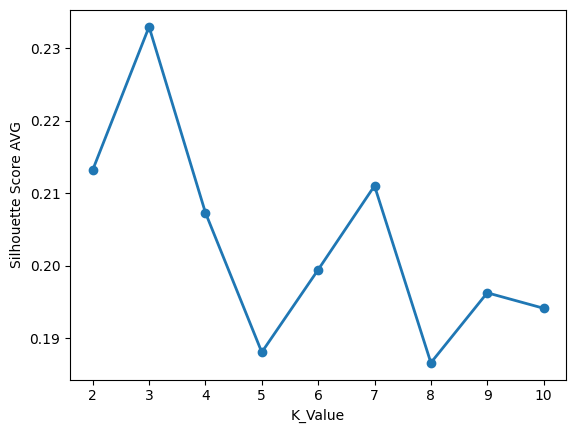

In [46]:
#K-Means
plt.plot(clusters_kmeans, ss_list_kmeans, marker='o', linewidth=2)
plt.xlabel('K_Value')
plt.ylabel('Silhouette Score AVG');

print('> K-means:')
print('Best Number of Clusters: 8')

In [47]:
#Affinity Propagation
print('> Affinity Propagation:')
print('Best Preference Value: {}'.format(p[max_index]))
print('Best Number of Clusters: {}'.format(len(np.unique(labels_afp))))

> Affinity Propagation:
Best Preference Value: -47
Best Number of Clusters: 4


#### 4.3.2 AVG Silhouette Score

In [48]:
#K-Means
print('> K-means:')
ss_avg_kmeans = mt.silhouette_score(X_ct, labels_kmeans)
print('AVG Silhouette Score: {:.4f}'.format(ss_avg_kmeans))
print('\n*****\n')

#Affinity Propagation
print('> Affinity Propagation:')
ss_avg_afp = mt.silhouette_score(X_ct, labels_afp)
print('AVG Silhouette Score: {:.4f}'.format(ss_avg_afp))
print('\n*****\n')

> K-means:
AVG Silhouette Score: 0.1942

*****

> Affinity Propagation:
AVG Silhouette Score: 0.1533

*****

